In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, MeanShift, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import pdist, squareform
import umap
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics import pairwise_distances
from sklearn.cluster import MeanShift
from sklearn.neighbors import NearestNeighbors


In [51]:
df = pd.read_csv("C:/Users/Anorm/Downloads/hw2_dataset.csv")

print(df.shape)
print()
print(df.info())
print()
df.head()

(969, 1025)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Columns: 1025 entries, ID to D_1023
dtypes: int64(1024), object(1)
memory usage: 7.6+ MB
None



,ID,D_0,D_1,D_2,D_3,D_4,D_5,D_6,D_7,D_8,...,D_1014,D_1015,D_1016,D_1017,D_1018,D_1019,D_1020,D_1021,D_1022,D_1023
0,AAEAMMIUQZAASJ-MRXNPFEDSA-N,1,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,0,1,1,1
1,AAEFNWQXBPYXAC-UHFFFAOYSA-N,1,1,1,1,0,1,1,1,0,...,1,0,1,1,1,0,0,1,1,1
2,AAMHSIWFDKXUMZ-UHFFFAOYSA-N,1,1,1,1,1,1,0,1,1,...,1,1,1,1,1,1,0,0,1,1
3,AAPQXEOSVSLLMB-UHFFFAOYSA-N,1,1,1,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,AARXXEHXOBTROW-UHFFFAOYSA-N,1,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,0,1,1,1


c:\Users\Anorm\anaconda3\envs\machinelearning\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\Anorm\anaconda3\envs\machinelearning\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\Anorm\anaconda3\envs\machinelearning\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\Anorm\anaconda3\envs\machinelearning\Lib\site-packages\sklearn\c

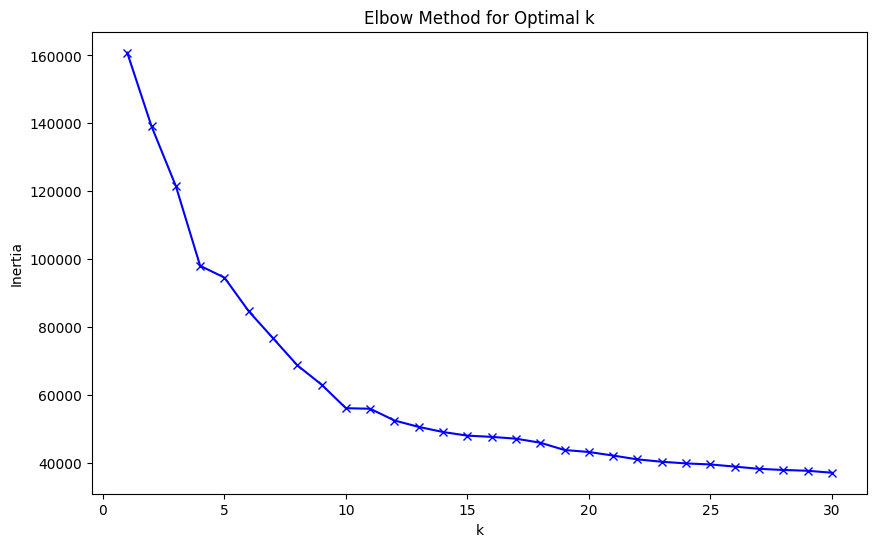

In [52]:
X = df.drop(df.columns[0], axis=1)
if not np.all(np.isin(X, [0, 1])):
    raise ValueError("Data contains values other than 0 and 1")
inertias = []
K = range(1, 31)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
plt.figure(figsize=(10, 6))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

Dropped the firsst column of ID's and checked for any columns that did not possess only 1's and 0's. Then I ran the kmeans elbow method to determine the optimal number of clusters for the binary dataset. 

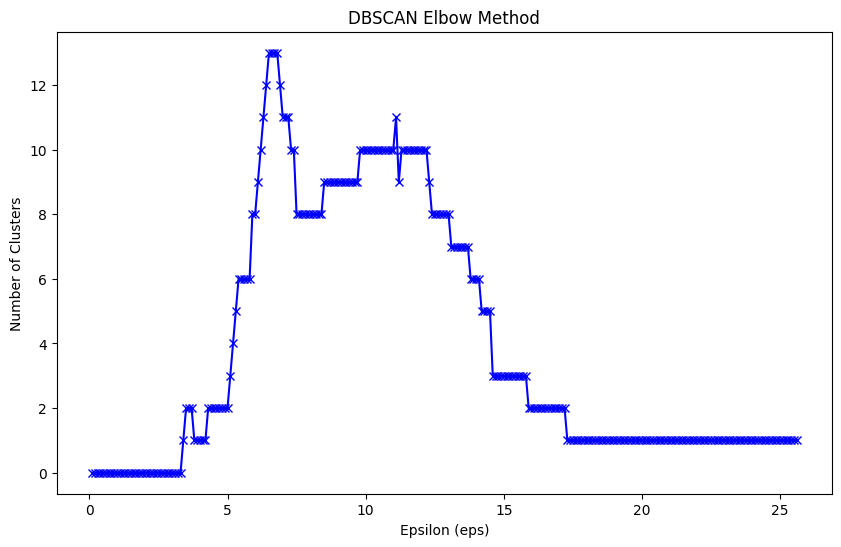

Optimal eps: 5.9
Optimal number of clusters: 8


In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

def dbscan_elbow(X, min_samples, eps_range):
    n_clusters = []
    eps_values = np.arange(eps_range[0], eps_range[1], 0.1)
    
    for eps in eps_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X)
        n_clusters.append(len(set(labels)) - (1 if -1 in labels else 0))
    
    plt.figure(figsize=(10, 6))
    plt.plot(eps_values, n_clusters, 'bx-')
    plt.xlabel('Epsilon (eps)')
    plt.ylabel('Number of Clusters')
    plt.title('DBSCAN Elbow Method')
    plt.show()
    
    return eps_values, n_clusters


# Estimate eps using NearestNeighbors
nn = NearestNeighbors(n_neighbors=2)
nbrs = nn.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
knee = np.diff(distances, 2)
knee_point = distances[np.argmax(knee)]

# Run DBSCAN Elbow Method
min_samples = 15  # Adjust based on your dataset
eps_range = (0.1, 2 * knee_point)  # Adjust range as needed
eps_values, n_clusters = dbscan_elbow(X, min_samples, eps_range)

# Find the elbow point
elbow_point = np.argmax(np.diff(n_clusters)) + 1
optimal_eps = eps_values[elbow_point]
optimal_clusters = n_clusters[elbow_point]

print(f"Optimal eps: {optimal_eps}")
print(f"Optimal number of clusters: {optimal_clusters}")

Made a function to run the elbow method for DBSCAN in order to determine the optimal EPS aand number of clusters for DBSCAN.

In [54]:
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(X)

# Function to plot UMAP results
def plot_umap(embedding, labels, title):
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap='viridis')
    plt.colorbar(scatter)
    plt.title(title)
    plt.show()

c:\Users\Anorm\anaconda3\envs\machinelearning\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Reduced the data using UMAP and made a plotting function so I can visualize the data as I go through trying the various clustering methods.

c:\Users\Anorm\anaconda3\envs\machinelearning\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\Anorm\anaconda3\envs\machinelearning\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\Anorm\anaconda3\envs\machinelearning\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\Anorm\anaconda3\envs\machinelearning\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL,

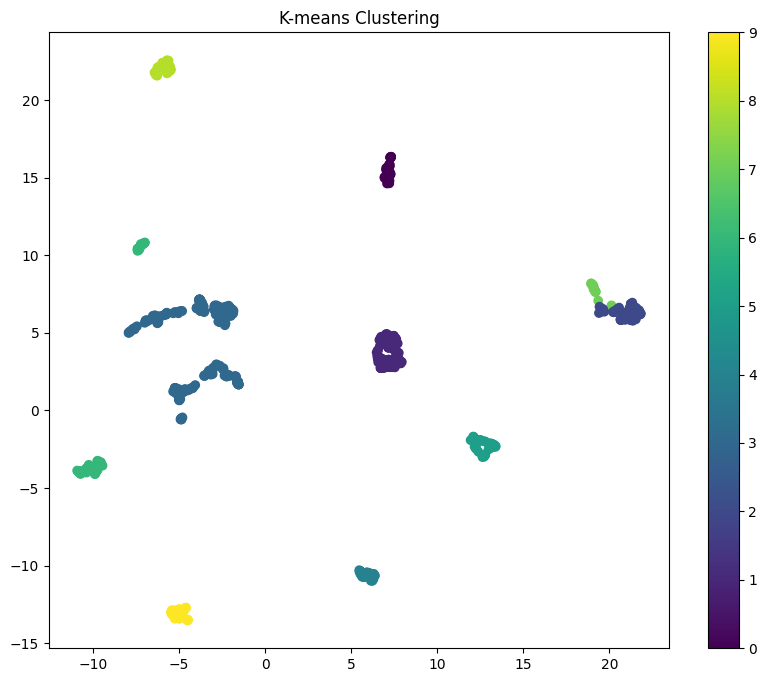

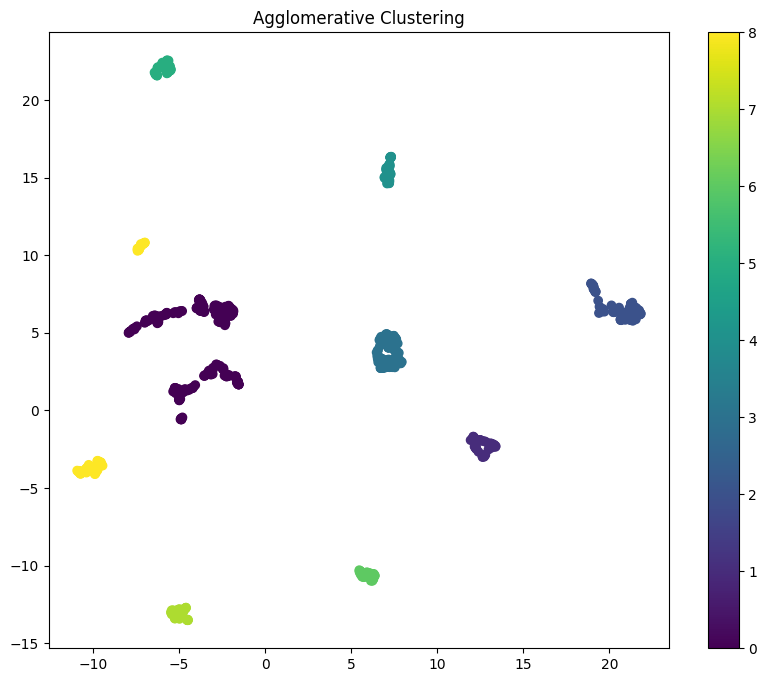

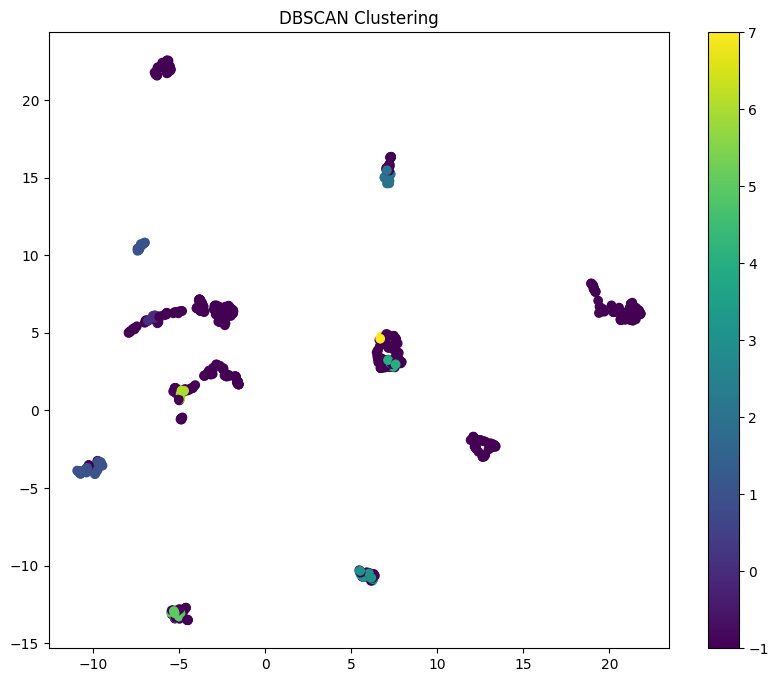

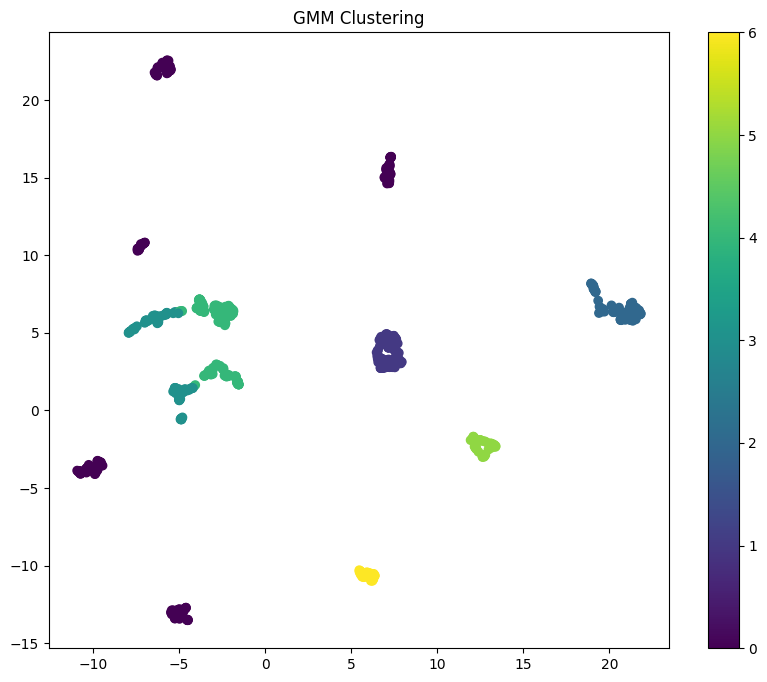

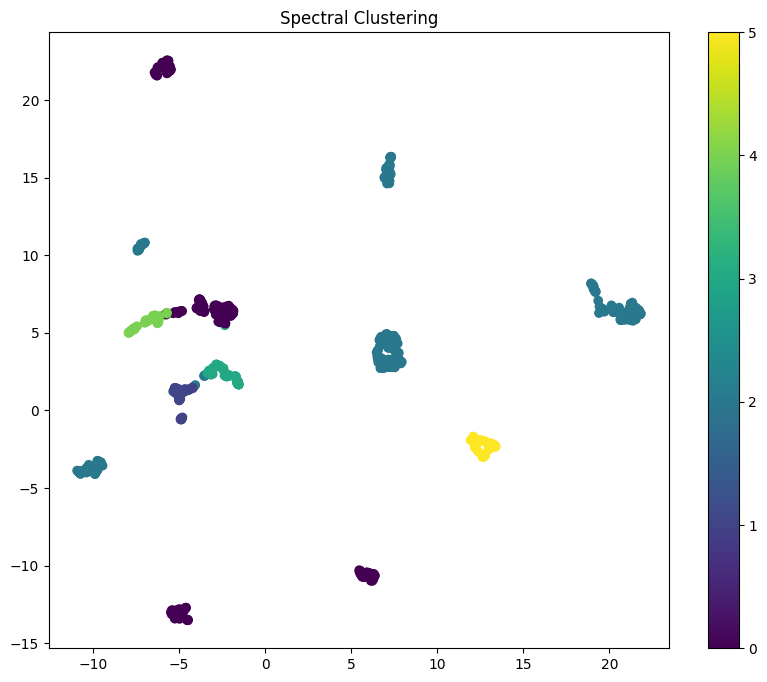

In [55]:
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Agglomerative Clustering
agglomerative = AgglomerativeClustering(n_clusters=9)
agglomerative_labels = agglomerative.fit_predict(X)

# DBSCAN
dbscan = DBSCAN(eps=5.9, min_samples=15)
dbscan_labels = dbscan.fit_predict(X)

#GaussianMixture
gmm = GaussianMixture(n_components=7, random_state=42)
gmm_labels = gmm.fit_predict(X)

# Spectral Clustering
spectral_clustering = SpectralClustering(n_clusters=6, affinity='nearest_neighbors', random_state=42)
spectral_labels = spectral_clustering.fit_predict(X)

plot_umap(embedding, kmeans_labels, 'K-means Clustering')
plot_umap(embedding, agglomerative_labels, 'Agglomerative Clustering')
plot_umap(embedding, dbscan_labels, 'DBSCAN Clustering')
plot_umap(embedding, gmm_labels, 'GMM Clustering')
plot_umap(embedding, spectral_labels, 'Spectral Clustering')

Use Kmeaans along with other Scikit learn methods to try to find the most effective clustering method. Experimented with different k values to try and find most efffective. 

c:\Users\Anorm\anaconda3\envs\machinelearning\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\Anorm\anaconda3\envs\machinelearning\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\Anorm\anaconda3\envs\machinelearning\Lib\site-packages\sklearn\cluster\_spectral.py:702: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
c:\Users\Anorm\anaconda3\envs\machinelearning\Lib\site-packages\sklearn\manifold\_spectral_embeddi

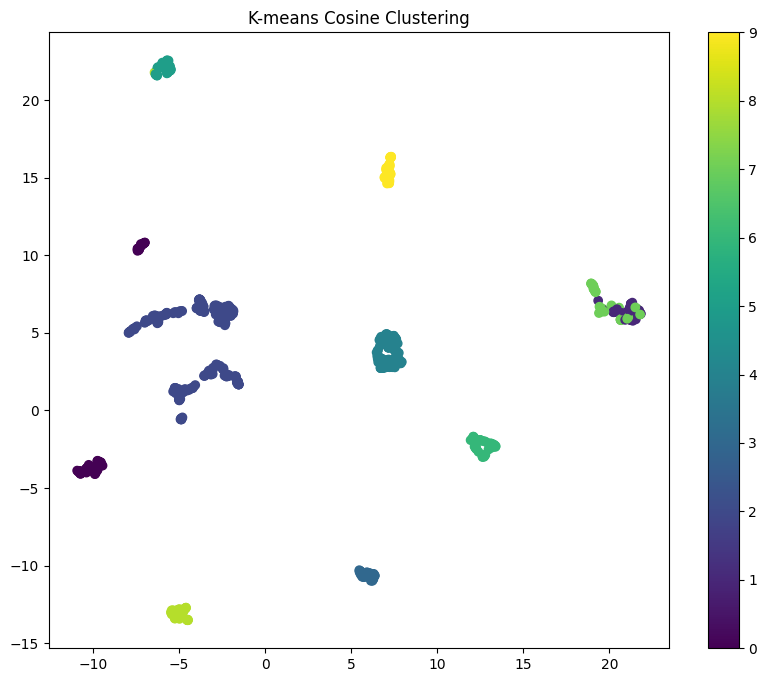

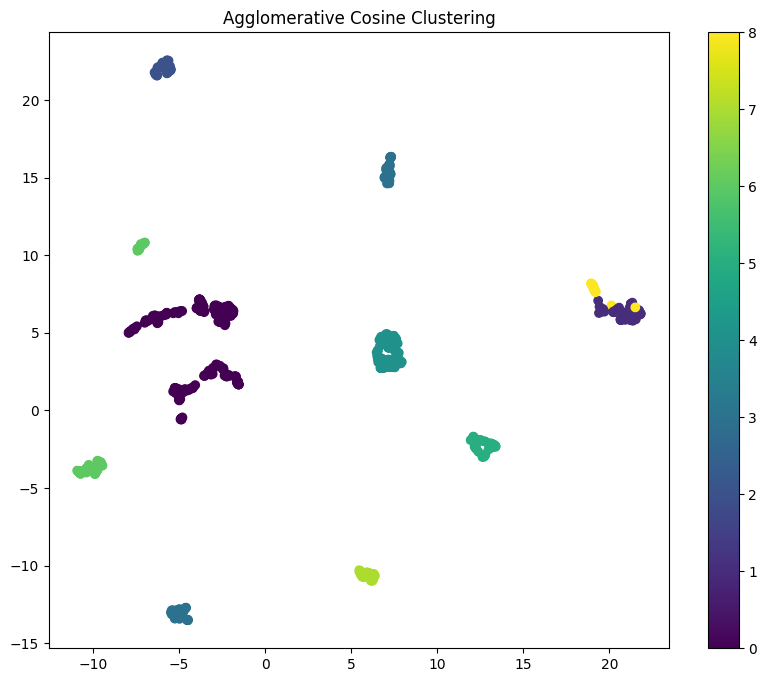

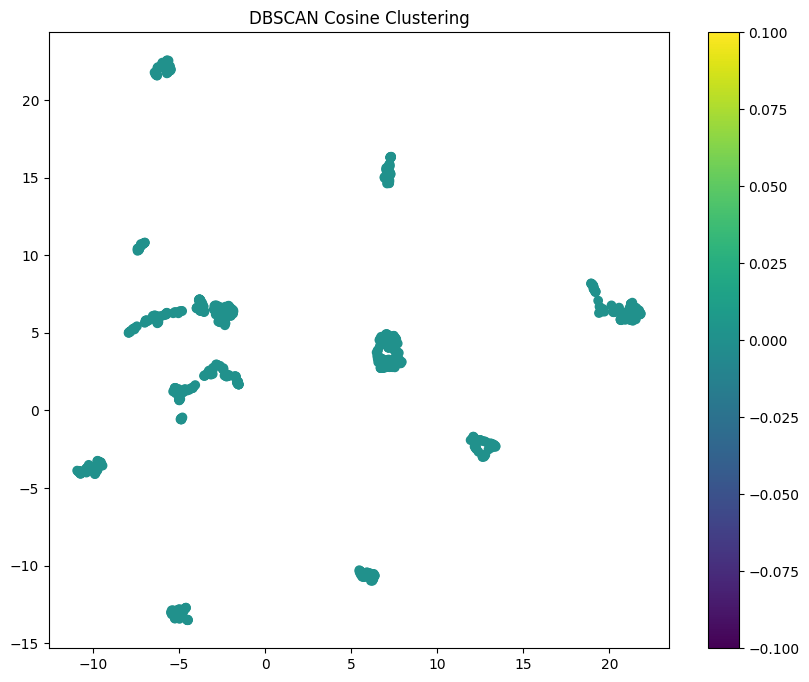

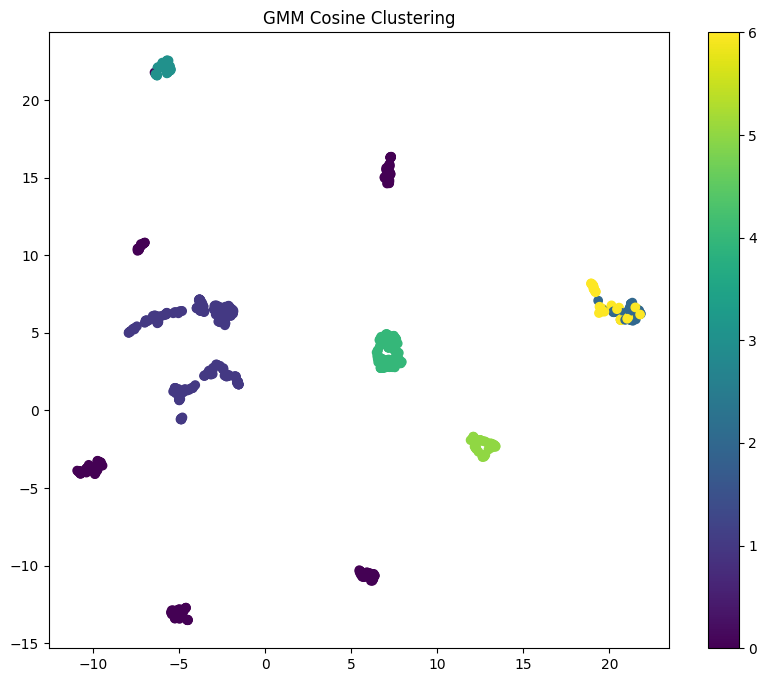

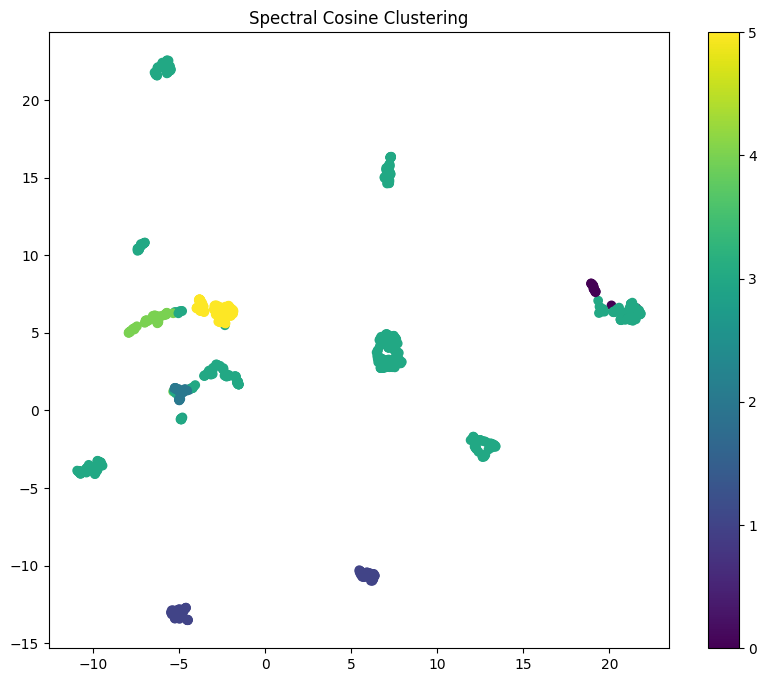

In [56]:
cosine_sim = cosine_similarity(X)
cosine_dist = 1 - cosine_sim

kmeans_cosine = KMeans(n_clusters=10, random_state=42)
kmeans_cosine_labels = kmeans_cosine.fit_predict(cosine_dist)

agglomerative_cos = AgglomerativeClustering(n_clusters=9)
agglomerative_cos_labels = agglomerative_cos.fit_predict(cosine_dist)

dbscan_cos = DBSCAN(eps=5.9, min_samples=15)
dbscan_cos_labels = dbscan_cos.fit_predict(cosine_dist)

gmm_cos = GaussianMixture(n_components=7, random_state=42)
gmm_labels_cos = gmm_cos.fit_predict(cosine_dist)

spectral_clustering_cos = SpectralClustering(n_clusters=6, affinity='nearest_neighbors', random_state=42)
spectral_labels_cos = spectral_clustering_cos.fit_predict(cosine_dist)

plot_umap(embedding, kmeans_cosine_labels, 'K-means Cosine Clustering')
plot_umap(embedding, agglomerative_cos_labels, 'Agglomerative Cosine Clustering')
plot_umap(embedding, dbscan_cos_labels, 'DBSCAN Cosine Clustering')
plot_umap(embedding, gmm_labels_cos, 'GMM Cosine Clustering')
plot_umap(embedding, spectral_labels_cos, 'Spectral Cosine Clustering')




Use Cosine distance metric and apply it to the previously tested clustering methods to try and see if it improves any of them. Tried different K values also to see if any improved or made clustering worse. 

c:\Users\Anorm\anaconda3\envs\machinelearning\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\Anorm\anaconda3\envs\machinelearning\Lib\site-packages\sklearn\cluster\_agglomerative.py:586: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)
c:\Users\Anorm\anaconda3\envs\machinelearning\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\Anorm\anaconda3\envs\machinelearning\Lib\site-packages\sklearn\cluster\_spectral.py:

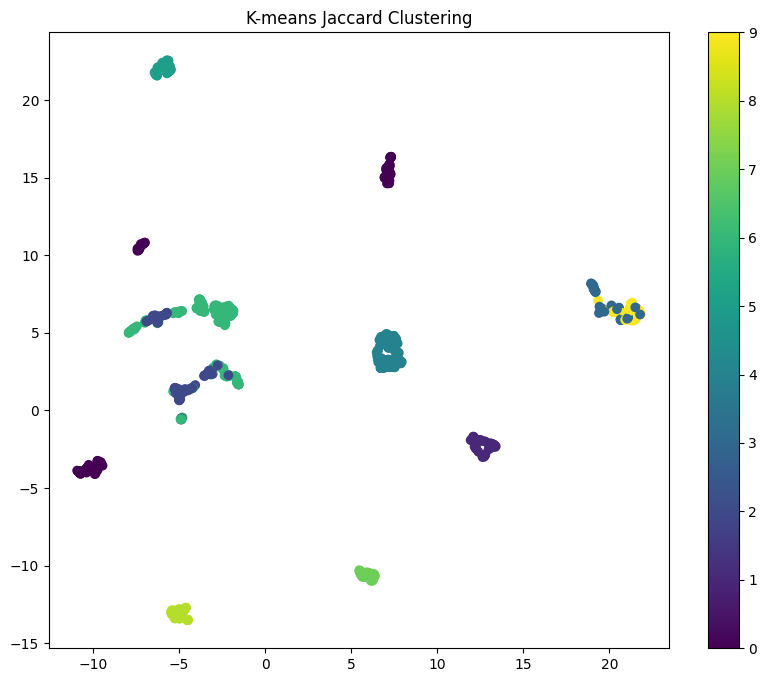

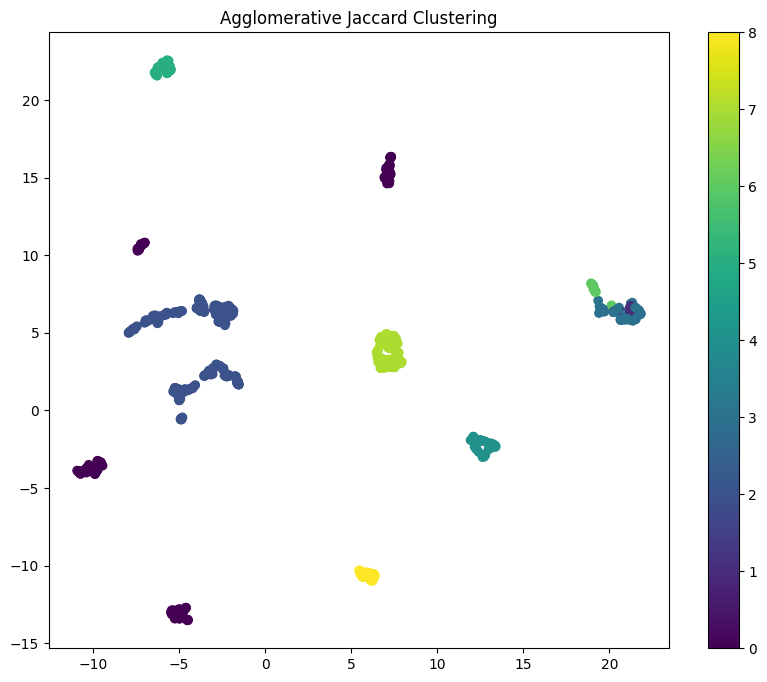

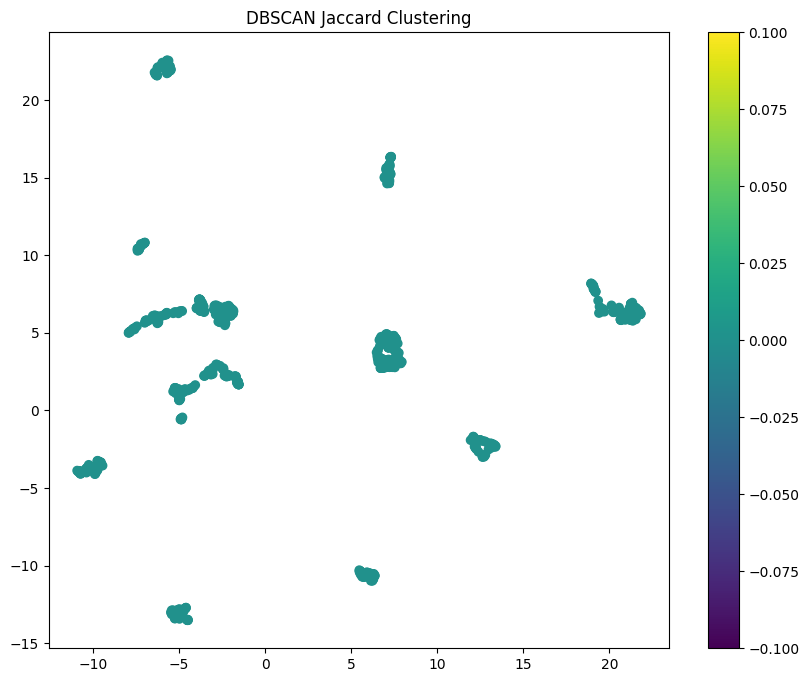

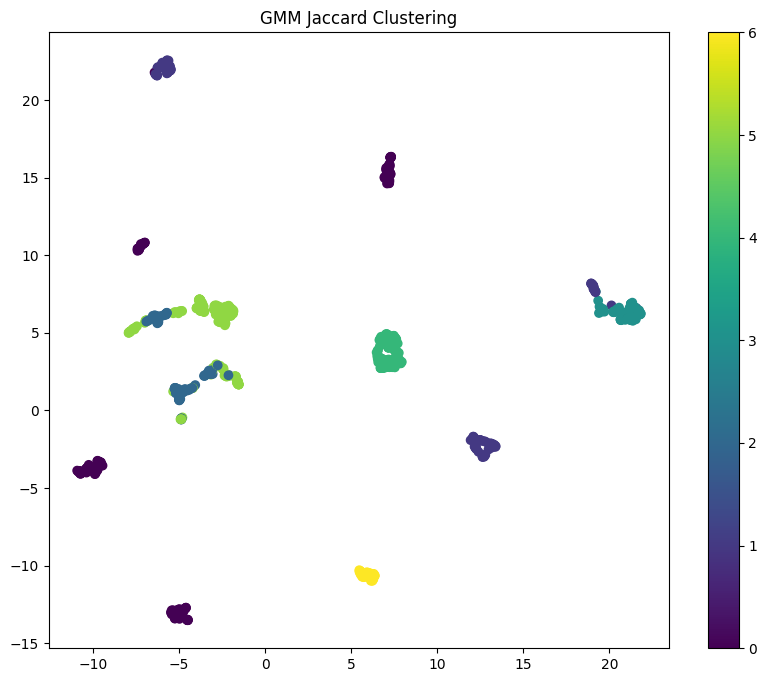

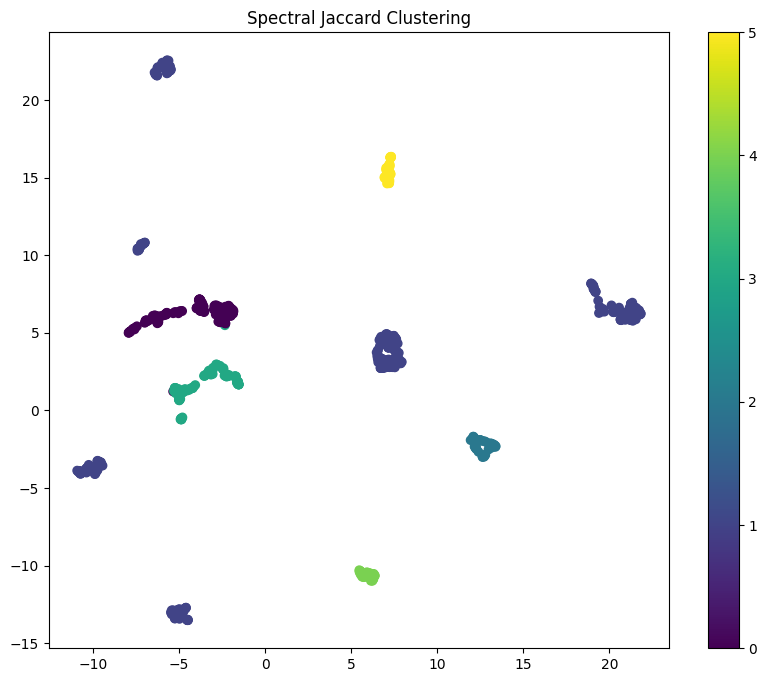

In [57]:
jaccard_distances = pdist(X, metric='jaccard')
distance_matrix = squareform(jaccard_distances)

kmeans_jac = KMeans(n_clusters=10, random_state=42)
kmeans_jac_labels = kmeans_jac.fit_predict(distance_matrix)

agglomerative_jac = AgglomerativeClustering(n_clusters=9, linkage='average')
agglomerative_jac_labels = agglomerative_jac.fit_predict(distance_matrix)

# DBSCAN
dbscan_jac = DBSCAN(eps= 5.9, min_samples=15, metric='precomputed')
dbscan_jac_labels = dbscan_jac.fit_predict(distance_matrix)

gmm_jac = GaussianMixture(n_components=7, random_state=42)
gmm_labels_jac = gmm_jac.fit_predict(distance_matrix)

spectral_clustering_jac = SpectralClustering(n_clusters=6, affinity='nearest_neighbors', random_state=42)
spectral_labels_jac = spectral_clustering_jac.fit_predict(distance_matrix)

plot_umap(embedding, kmeans_jac_labels, 'K-means Jaccard Clustering')
plot_umap(embedding, agglomerative_jac_labels, 'Agglomerative Jaccard Clustering')
plot_umap(embedding, dbscan_jac_labels, 'DBSCAN Jaccard Clustering')
plot_umap(embedding, gmm_labels_jac, 'GMM Jaccard Clustering')
plot_umap(embedding, spectral_labels_jac, 'Spectral Jaccard Clustering')


Use Jaccard distance metric and apply it to the previously tested clustering methods to try and see if it improves any of them. Tried different K values also to see if any improved or made clustering worse.

In [58]:
from sklearn.metrics import silhouette_score

print("Silhouette Scores:")
print("K-means:", silhouette_score(X, kmeans_labels, metric='jaccard'))
print("Agglomerative:", silhouette_score(distance_matrix, agglomerative_labels, metric='precomputed'))
print("DBSCAN:", silhouette_score(X, dbscan_labels, metric='jaccard'))
print("Spectral Jaccard Clustering:", silhouette_score(X, spectral_labels_jac, metric='jaccard'))

Silhouette Scores:


c:\Users\Anorm\anaconda3\envs\machinelearning\Lib\site-packages\sklearn\metrics\pairwise.py:2361: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


K-means: 0.5142162955169818
Agglomerative: 0.5190249596426697


c:\Users\Anorm\anaconda3\envs\machinelearning\Lib\site-packages\sklearn\metrics\pairwise.py:2361: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


DBSCAN: -0.11850219791648355


c:\Users\Anorm\anaconda3\envs\machinelearning\Lib\site-packages\sklearn\metrics\pairwise.py:2361: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


Spectral Jaccard Clustering: 0.17365853257362013


Tested the silhouette scores of the plots that appeard to best cluster the data in order to see which one got the closest score to 1 and thus which one seems to be most effective. 

In conclusion, I tested a variety of clustering methods along with different distance metrics to see which combination could do the best job breaking the data down into clusters. I also used the K-means clustering elbow method and the DBSCAN elbow method to find the optimal inputs for those methods. Reading the K-means graph, I tried both a cluster number of 4 and a cluster number of 10. The cluster number of 10 seemed to make more sense. As for the results, it appeard the K-means with the basic Euclidean distance metric and 10 clusters and the Agglomerative clutering with Ward linkage and 9 clusters seemed to produce the best results. The other basic methods seemed to confuse the clusters and intermix clusters that should not have gone with each other. When the Cosine and Jaccard distance methods were attempted, they did not help the performance of the clusters and also seemed to intermix clusters that did not belong with one another. The ineffectiveness of the Jaccard distance was surprising because based on external research, it seemed that Jaccard distance was best for binary datasets. The nature of binary data allows for clear distance calcluation so this could contribute to the effectiveness of the Euclidean and Ward method. The clusters are also relatively spherical which also plays in the favor of K-means. It seems that Jaccard and Cosine distance metrics may have struggled due to the nature of the incompatibility with the methods they were applied to and the high dimensionality of the dataset. DBSCAN struggled with all three distance metrics used, this may be due to the high dimensionality of the binary data, making the concept of distance less useful and thus the algorithm had a harder time identifying the density of regions. There are also no outliers in a binary dataset inthe same sense as a continuous dataset, so the typical ineffectiveness of K-means to deal with outliers was not a problem. I think the GMM and Spectral clustering techniques were not super effective due to the relatively simple nature of a binary dataset and the relatively simple shapes of the clusters. To wrap this up, in using UMAP reduction, I found the default K-means and Agglomerative clustering to be most effective. 